(1025, 13)
Balanced Accuracy: 0.87


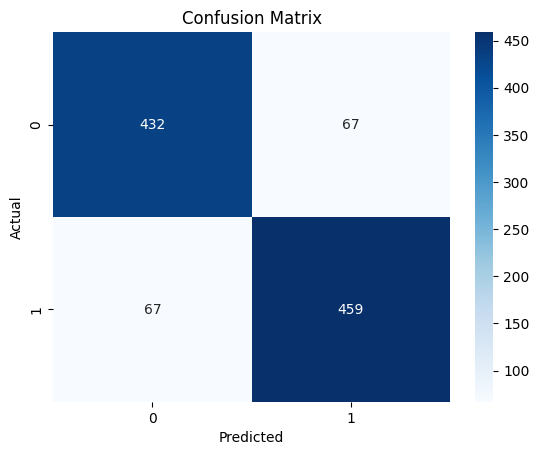

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# April 2024

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the heart disease dataset
fileName = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/heart_disease.csv"
data = pd.read_csv(fileName)

X = data.drop("disease", axis=1)
y = data["disease"]

# Initialize 10-fold stratified split
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store predictions and real values
all_preds = []
all_y_test = []

for train_index, test_index in skf.split(X, y):
    # Splitting data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardizing the features based on the training set
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(X_train_scaled, y_train)

    # Store predictions and real values
    preds = model.predict(X_test_scaled)
    all_preds.extend(preds)
    all_y_test.extend(y_test)

# Calculate metrics
balanced_acc = balanced_accuracy_score(all_y_test, all_preds)

# Print metrics
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Confusion Matrix Heatmap
conf_mat = confusion_matrix(all_y_test, all_preds)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()
